In [21]:
import os
import pandas as pd

base_dir = 'datasets/satellitesegmentation'
image_files = [f for f in os.listdir(base_dir) if f.endswith('_sat.jpg')]
mask_files = [f for f in os.listdir(base_dir) if f.endswith('_mask.png')]

images = {f.split('_')[0]: f for f in image_files}
masks = {f.split('_')[0]: f for f in mask_files}

pairs = []
for id_ in images:
    if id_ in masks:
        pairs.append([os.path.join(base_dir, images[id_]), os.path.join(base_dir, masks[id_])])

pd.DataFrame(pairs, columns=['image_path', 'mask_path']).to_csv('final_dataset.csv', index=False)


In [22]:
df = pd.read_csv('final_dataset.csv')

In [23]:
df.shape

(6226, 2)

In [24]:
df.isnull().sum()

image_path    0
mask_path     0
dtype: int64

In [25]:
df.head()

,image_path,mask_path
0,datasets/satellitesegmentation/401242_sat.jpg,datasets/satellitesegmentation/401242_mask.png
1,datasets/satellitesegmentation/804816_sat.jpg,datasets/satellitesegmentation/804816_mask.png
2,datasets/satellitesegmentation/505418_sat.jpg,datasets/satellitesegmentation/505418_mask.png
3,datasets/satellitesegmentation/345264_sat.jpg,datasets/satellitesegmentation/345264_mask.png
4,datasets/satellitesegmentation/169287_sat.jpg,datasets/satellitesegmentation/169287_mask.png


In [26]:
df.tail()

,image_path,mask_path
6221,datasets/satellitesegmentation/436153_sat.jpg,datasets/satellitesegmentation/436153_mask.png
6222,datasets/satellitesegmentation/716527_sat.jpg,datasets/satellitesegmentation/716527_mask.png
6223,datasets/satellitesegmentation/899123_sat.jpg,datasets/satellitesegmentation/899123_mask.png
6224,datasets/satellitesegmentation/681104_sat.jpg,datasets/satellitesegmentation/681104_mask.png
6225,datasets/satellitesegmentation/73185_sat.jpg,datasets/satellitesegmentation/73185_mask.png


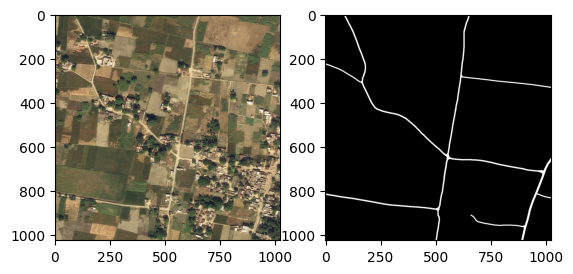

In [34]:
import pandas as pd
import cv2
from matplotlib import pyplot as plt

df = pd.read_csv('final_dataset.csv')
sample = df.sample(1).iloc[0]
img = cv2.imread(sample['image_path'])
mask = cv2.imread(sample['mask_path'], 0)
plt.subplot(1,2,1); plt.imshow(img[...,::-1])
plt.subplot(1,2,2); plt.imshow(mask, cmap='gray')
plt.show()


In [35]:
import pandas as pd
import os
import cv2

df = pd.read_csv('final_dataset.csv')
for i, row in df.iterrows():
    img_path = row['image_path']
    mask_path = row['mask_path']
    if not os.path.exists(img_path):
        print('Missing image:', img_path)
    else:
        img = cv2.imread(img_path)
        if img is None:
            print('Unreadable image:', img_path)
    if not os.path.exists(mask_path):
        print('Missing mask:', mask_path)
    else:
        mask = cv2.imread(mask_path, 0)
        if mask is None:
            print('Unreadable mask:', mask_path)


In [36]:
import pandas as pd
import os
import cv2
import numpy as np

src_csv = 'final_dataset.csv'
dst_dir = 'binarized_masks'
os.makedirs(dst_dir, exist_ok=True)

df = pd.read_csv(src_csv)
bin_csv_rows = []

for _, row in df.iterrows():
    img_path = row['image_path']
    mask_path = row['mask_path']
    base = os.path.basename(mask_path)
    bin_path = os.path.join(dst_dir, base)

    mask = cv2.imread(mask_path, 0)
    if mask is None:
        print("Missing or unreadable mask:", mask_path)
        continue

    bin_mask = (mask > 128).astype('uint8') * 255
    cv2.imwrite(bin_path, bin_mask)

    bin_csv_rows.append({'image_path': img_path, 'mask_path': bin_path})

pd.DataFrame(bin_csv_rows).to_csv('final_binarized_dataset.csv', index=False)


In [37]:
import pandas as pd
import numpy as np
import cv2

df = pd.read_csv('final_binarized_dataset.csv')
for _, row in df.iterrows():
    m = cv2.imread(row['mask_path'], 0)
    if m is None:
        print('Unreadable binarized mask:', row['mask_path'])
        continue
    uniq = np.unique(m)
    if not np.array_equal(uniq, np.array([0, 255], dtype=np.uint8)):
        print('Mask not properly binarized:', row['mask_path'], 'unique=', uniq)


In [38]:
bin = pd.read_csv('final_binarized_dataset.csv')

In [39]:
bin.shape

(6226, 2)

In [40]:
if(df.shape == bin.shape):
    print("Correct")

Correct


In [41]:
bin.isnull().sum()

image_path    0
mask_path     0
dtype: int64